 Data Cleaning & Preprocessing (Data Visualization)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

In [2]:
# Load the dataset
file_path = "Data_for_UCI_named.csv"
df = pd.read_csv(file_path)

In [3]:
# Initial Data Exploration
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB
None

First 5 Rows:
       tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.9400

In [4]:
# Checking for Missing Values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64


In [5]:
#  Checking for Duplicate Rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")
df = df.drop_duplicates()
print(f"Removed {duplicate_rows} duplicate rows.")


Number of duplicate rows: 0
Removed 0 duplicate rows.


In [6]:
# Encoding Categorical Column ('stabf')
label_encoder = LabelEncoder()
df['stabf'] = label_encoder.fit_transform(df['stabf'])
print("\nConverted 'stabf' column into numerical values:")
print(f"Mapping: {dict(enumerate(label_encoder.classes_))}")
print(f"Unique values in 'stabf' after encoding: {df['stabf'].unique()}")


Converted 'stabf' column into numerical values:
Mapping: {0: 'stable', 1: 'unstable'}
Unique values in 'stabf' after encoding: [1 0]


In [7]:
#  Detecting Outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [8]:
# Define Outlier Thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [9]:
# Count Outliers per Column
outlier_counts = ((df < lower_bound) | (df > upper_bound)).sum()
print("\nOutliers detected using IQR Method:")
print(outlier_counts)


Outliers detected using IQR Method:
tau1     0
tau2     0
tau3     0
tau4     0
p1       1
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64


In [10]:
# Removing Outliers
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print(f"\nTotal Outliers Removed: {df.shape[0] - df_cleaned.shape[0]}")


Total Outliers Removed: 1


In [11]:
#  Feature Scaling using StandardScaler
scaler = StandardScaler()
numerical_cols = df_cleaned.columns[:-1]  # Exclude the target variable
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

<ipython-input-11-8c5a968dfcd8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])


In [12]:

print("\nFeature Scaling Applied:")
print(df_cleaned[numerical_cols].head())


Feature Scaling Applied:
       tau1      tau2      tau3      tau4        p1        p2        p3  \
0 -0.835291 -0.791218  1.141922  1.652005  0.017115  1.079684 -0.016923   
1  1.478296 -0.126609 -0.803011 -1.415149  1.752476 -1.593603 -1.438106   
2  1.357097  1.312229 -0.803399 -1.471610 -0.458947  0.098435 -0.062687   
3 -1.653026  0.882380 -0.278222 -1.061006  0.284066  0.514127 -1.591005   
4 -0.771462  0.860199 -0.111528  1.680016 -0.298473  0.287650 -1.376287   

         p4        g1        g2        g3        g4      stab  
0 -1.092480  0.457491  1.220173  1.321551  1.578919  1.073245  
1 -0.011405 -0.406732  1.230514  0.135406  0.936175 -0.587383  
2  0.761209 -1.319756  0.881449  1.146528 -1.513781 -0.331988  
3  0.583643 -0.287250  1.647422  1.474459 -0.591768  0.356038  
4  1.606964  0.992227 -0.253492  0.481098  1.078977  0.924610  


In [13]:
# Save Cleaned Data
cleaned_file_path = "cleaned_grid_data.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"\n Cleaned dataset saved as '{cleaned_file_path}'")


 Cleaned dataset saved as 'cleaned_grid_data.csv'


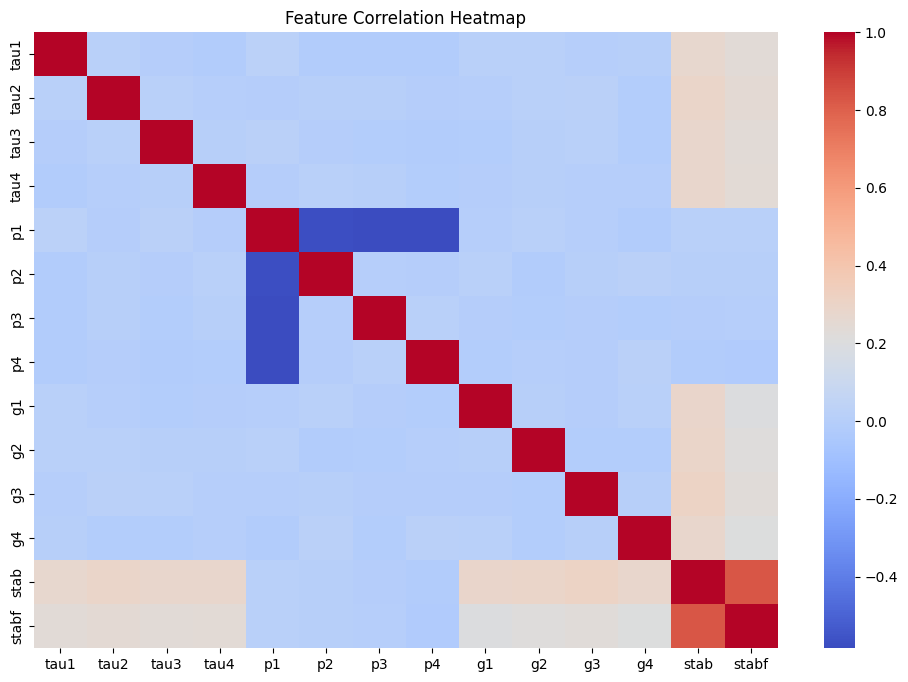

In [14]:
#  Data Visualization

##  Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

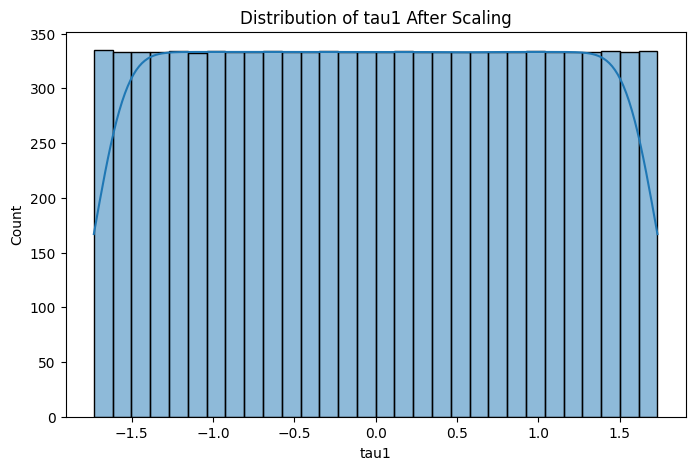

In [15]:
## 🔹 Histogram Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['tau1'], bins=30, kde=True)
plt.title("Distribution of tau1 After Scaling")
plt.show()

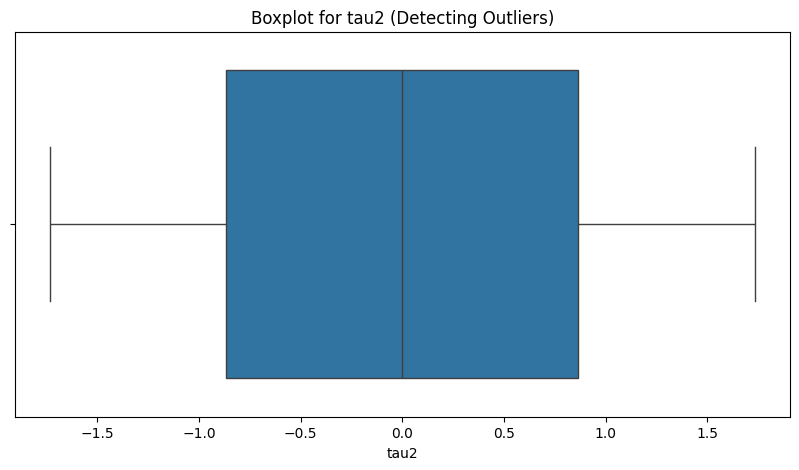

In [16]:
##  Boxplot for Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned['tau2'])
plt.title("Boxplot for tau2 (Detecting Outliers)")
plt.show()

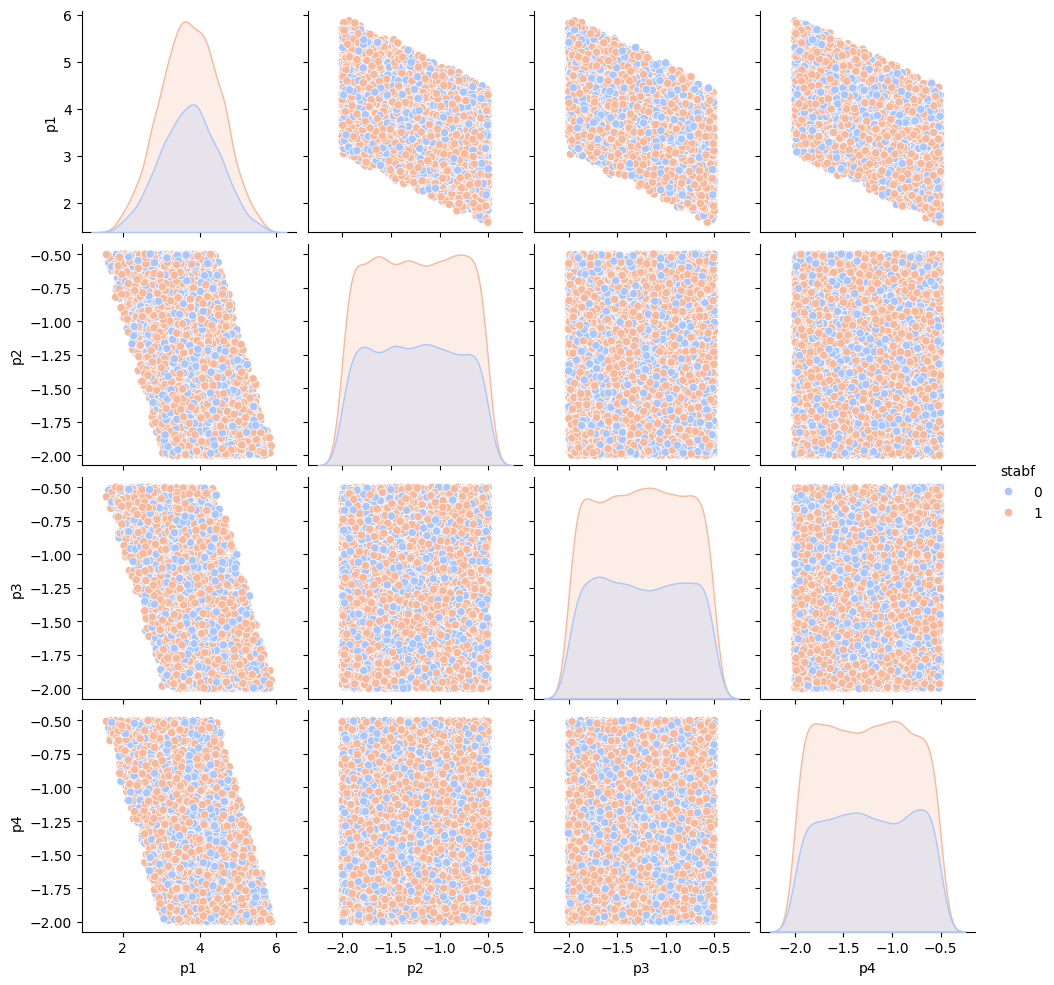

In [17]:
##  Pairplot for Feature Relationships
# Ensure no spaces in column names
df.columns = df.columns.str.strip()
# Select a subset of features for visualization (to avoid overcrowding)
selected_features = ['p1', 'p2', 'p3', 'p4', 'stabf']
# Pairplot
sns.pairplot(df[selected_features], hue='stabf', diag_kind='kde', palette='coolwarm')
plt.show()

Model Building & Performance Evaluation (Visualization)

In [18]:
# Splitting features and target variable
X = df.drop(columns=['stabf'])
y = df['stabf']

In [19]:
# Splitting the dataset into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

In [22]:
# Dictionary to store evaluation metrics
model_scores = {}


In [23]:
# Training & Evaluating Models
for model_name, model in models.items():
    print(f"\n Training {model_name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    model_scores[model_name] = acc  # Store accuracy score


 Training Logistic Regression...

 Training Random Forest...

 Training Support Vector Machine...


In [24]:
# Print performance metrics
print(f"✅ {model_name} Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))

✅ Support Vector Machine Accuracy: 0.9815
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       693
           1       0.99      0.98      0.99      1307

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



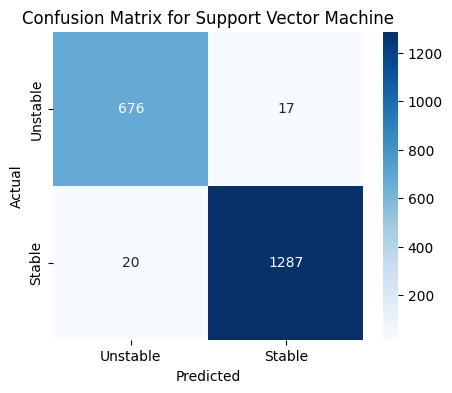

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Unstable', 'Stable'], yticklabels=['Unstable', 'Stable'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix for {model_name}")
plt.show()

<ipython-input-26-a088669a249b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()), palette="viridis")


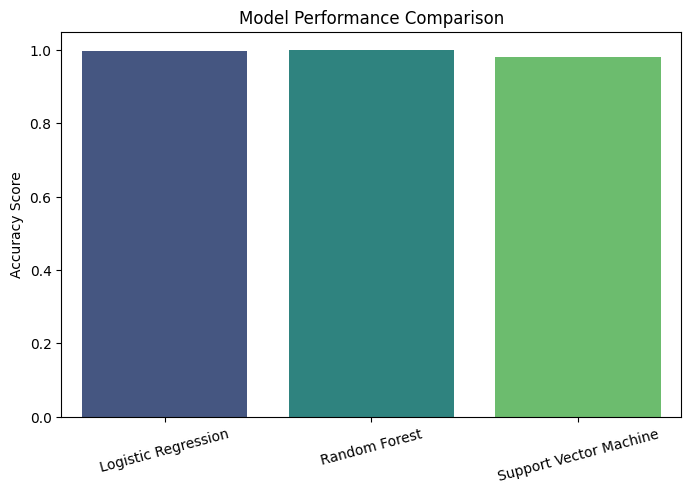

In [26]:
# Compare Model Performance
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()), palette="viridis")
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.xticks(rotation=15)
plt.show()

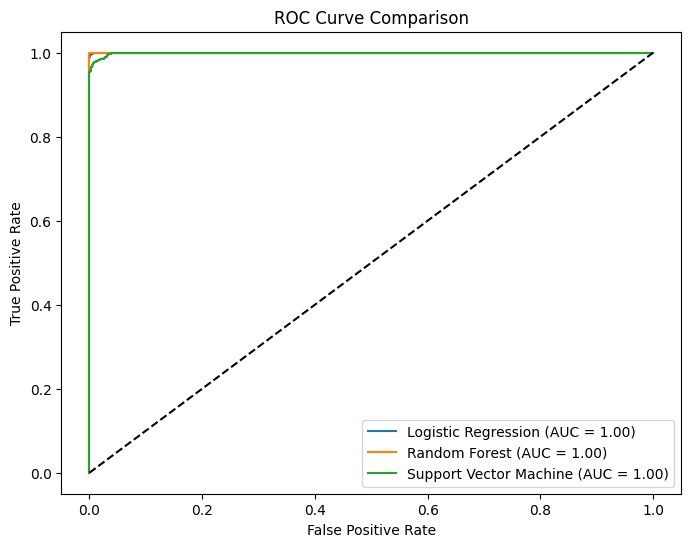

In [27]:
# ROC Curve Comparison
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probability scores
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()